#$\kappa$ for Couette Flow

Couette flow is given by

$\Omega(r) = A + \frac{B}{r^2}$,

with 

$A = -\Omega_1 \eta^2 \frac{1 - \mu/\eta^2}{1-\eta^2}$

$B = \Omega_1 R_1^2 \frac{1-\mu}{1-\eta^2}$

$\mu \equiv \frac{\Omega_1}{\Omega_2}$

$\eta \equiv \frac{R_1}{R_2}$

The epicyclic frequency $\kappa$ is defined as 

$\kappa^2 = \frac{1}{r^3} \frac{d (r^2 \Omega)^2}{dr}$

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [45]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [46]:
def kappa_sq(r,Omega1, mu, eta, R1):
    return -4*Omega1**2 * eta**2 *(1-mu)*(1-mu/eta**2)/(1-eta**2)**2 * (R1**2/r**2 - eta**2*(1-mu/eta**2)/(1-mu))

In [47]:
R1 = 10.
R2 = 11.
nr = 1000
Omega1 = 1.
Omega2 = 0.84
mu = Omega2/Omega1
eta = R1/R2
r = np.linspace(R1,R2,nr,endpoint=False)

In [48]:
k2 = kappa_sq(r,Omega1,mu,eta,R1)

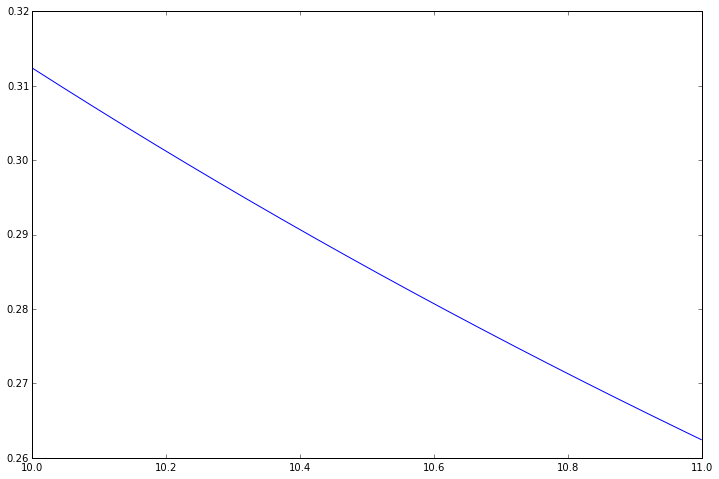

In [49]:
plt.plot(r,k2)

The Rayleigh criterion for the stability inviscid differential rotation is $\kappa^2 > 0$. Of course, Couette flow is viscous, so it's not quite applicable, but it gives a general idea in the limit of low $\nu$. Here, we sweep through the rotation rate of the *outer* cylinder ($\Omega_2$) from 0.9 to 0.6.

In [50]:
eta = 99/100. #10/11.
print(r"gap width parameter $\epsilon$ = {}".format(1/eta - 1.))
R1 = eta/(1. - eta)
R2 = 1./(1-eta)
nr = 1000
Omega1 = 1./R1
print(r"R1 = {}, R2 = {}, Omega1 = {}".format(R1, R2,Omega1))
eta = R1/R2
print('eta = {}'.format(eta))
r = np.linspace(R1,R2,nr,endpoint=False)

Omegas = np.linspace(0.8,0.99,5)*Omega1
k2 = []
mu = []
for Omega2 in Omegas:
    mu.append(Omega2/Omega1)
    k2.append(kappa_sq(r,Omega1,mu[-1],eta,R1))

gap width parameter $\epsilon$ = 0.010101010101010166
R1 = 98.99999999999991, R2 = 99.99999999999991, Omega1 = 0.01010101010101011
eta = 0.99


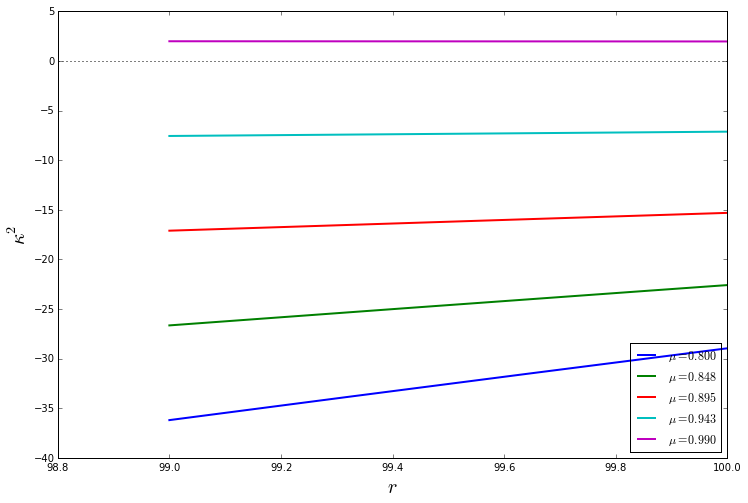

In [51]:
for i,k in enumerate(k2):
    plt.plot(r,k/Omega1**2,label=r'$\mu = {:5.3f}$'.format(mu[i]),linewidth=2)

plt.axhline(0,color='k',linestyle=':')
plt.xlabel("$r$",size=20)
plt.ylabel(r"$\kappa^2$",size=20)
plt.legend(loc='lower right')

looks like $\mu = 0.9425$ is a gives 

(99, 100)

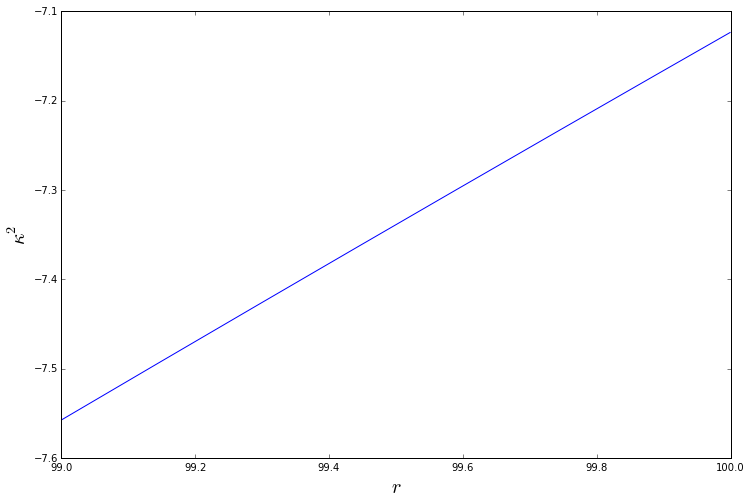

In [52]:
ks = kappa_sq(r,Omega1,0.9425,eta,R1)
plt.plot(r,ks/Omega1**2)

#plt.axvline(10.5,color='k',linestyle=':')
#plt.axhline(-3,color='k',linestyle=':')

plt.xlabel("$r$",size=20)
plt.ylabel(r"$\kappa^2$",size=20)
plt.xlim(99,100)

In [53]:
print("total change in $\kappa^2$ over domain: {}".format((ks[-1]-ks[0])/ks[0]))
print("$\kappa^2 at midpoint of domain: {}".format(ks[nr/2-1]))

total change in $\kappa^2$ over domain: -0.057443360205680465
$\kappa^2 at midpoint of domain: -0.0007488316749707947
